In [5]:
import torch
import numpy as np

import skimage.io as io
from skimage.transform import resize

import random
from random import shuffle

from PIL import Image
import matplotlib.pyplot as plt

from sympy.utilities.iterables import multiset_permutations
%matplotlib inline

Shape of original image =  (800, 1200, 3)
Shape of resized image =  (255, 255, 3)


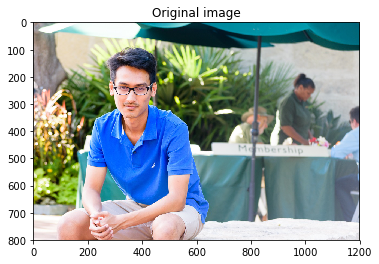

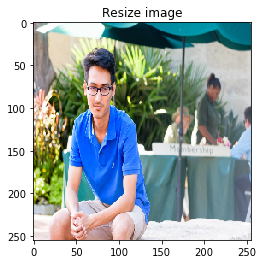

In [6]:
# Read image in numpy array
input_image = io.imread('oyesh_public_pic.jpg')
fig1 = plt.figure()
plt.title("Original image")
plt.imshow(input_image)
print("Shape of original image = ", input_image.shape)

# Resize image to 255 x 255
input_image = resize(input_image, (255,255))
print("Shape of resized image = ", input_image.shape)
fig2 = plt.figure()
plt.title("Resize image")
plt.imshow(input_image)

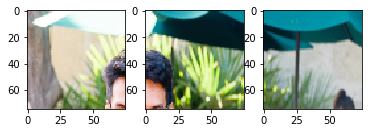

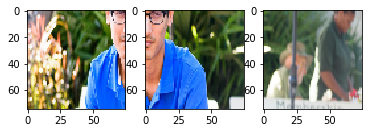

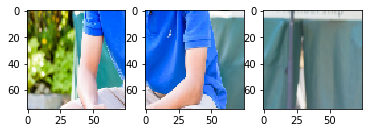

In [7]:
# List to store cropped 75 x 75 patches
patch_list = []

# Crop 75 x 75 patch size and store it
for r in range(0,225,75):
    for c in range(0,225,75):
        patch = input_image[c:c+75, r:r+75, :]
        patch_list.append(patch)

# Just to display 75x75 patches accordingly
fig = plt.figure()
fig.add_subplot(1,3,1)
plt.imshow(patch_list[0])
fig.add_subplot(1,3,2)
plt.imshow(patch_list[3])
fig.add_subplot(1,3,3)
plt.imshow(patch_list[6])

fig1 = plt.figure()
fig1.add_subplot(1,3,1)
plt.imshow(patch_list[1])
fig1.add_subplot(1,3,2)
plt.imshow(patch_list[4])
fig1.add_subplot(1,3,3)
plt.imshow(patch_list[7])

fig2 = plt.figure()
fig2.add_subplot(1,3,1)
plt.imshow(patch_list[2])
fig2.add_subplot(1,3,2)
plt.imshow(patch_list[5])
fig2.add_subplot(1,3,3)
plt.imshow(patch_list[8])


In [8]:
num_patch = 9
patch_size = 64
num_channels = 3

# realPatch is 64x64 taken with 75x75 patches
realPatch = torch.Tensor(num_patch, patch_size, patch_size,num_channels)
# print("Checking realPatch size = ", realPatch.size())

# Cropping 64x64 patch from 75x75 patches
for i, patch in enumerate(patch_list):
    # Because there is gap of 11 pixel between 64 and 75 sized patch
    rand = random.randrange(0,10)        
    realPatch[i] = torch.Tensor(patch[rand:rand+64, rand:rand+64])

# Method to create top100 permutations
# import numpy as np

def getPermutations():
    permute = []
    arr = np.array([0,1,2,3,4,5,6,7,8])
    for p in multiset_permutations(arr):
        permute.append(p)
    random.shuffle(permute)
    top100 = permute[:100]
    return top100

# Just an index to give to each permutations
permuteIndex = torch.range(0,99)
permuteIndex = torch.t(permuteIndex.unsqueeze(0).long())
# print(permuteIndex.size())

# Get top100 permutations
permutations = getPermutations()

# Convert list to numpy array
perm = np.asarray(permutations)

# Convert numpy array to torch tensor
perm = torch.from_numpy(perm)
# print(perm.size())

# Concatenate index and permutations
jointPerm = torch.cat((permuteIndex, perm), 1)
# print(jointPerm.size())

In [13]:
'''
I think selecting a random index is not necessary
because the permutations are randomly shuffled
already. So, we just need to select the permutations
in sequential order
'''

# Select a random integer between 0-99
# rand_index = np.random.randint(0,99)
# print(rand_index)

# Select a random permutation
# selectedPerm = jointPerm[rand_index]
selectedPerm = jointPerm[0]

# Separate the index and permutation part
selectedIndex, selectedPermOnly = selectedPerm[0], selectedPerm[1:]

# print(selectedPermOnly.size())
# print(realPatch.size())

# Create new patch storage similar to realPatch tensor
randomizePatch = realPatch.clone() 

# Select the patches in selected random permutation order
for i, each_patch in enumerate(realPatch):
    index = selectedPermOnly[i]
    randomizePatch[i] = realPatch[selectedPermOnly[i]]

In [14]:
# totalPatch is 100 for each input image 
# because of 100 permutations for each case
totalPatch = torch.Tensor(100,9,64,64,3)
totalLabel = torch.Tensor(100,1)

for each_permute in range(100):
    # Select a random integer between 0-99
    selectedPerm = jointPerm[each_permute]

    # Separate the index and permutation part
    selectedIndex, selectedPermOnly = selectedPerm[0], selectedPerm[1:]

    # Create new patch storage similar to realPatch tensor
    randomizePatch = realPatch.clone().zero_()

    # Select the patches in selected random permutation order
    for i, each_patch in enumerate(realPatch):
        index = selectedPermOnly[i]
        randomizePatch[i] = realPatch[selectedPermOnly[i]]
        
    totalPatch[each_permute] = randomizePatch
    totalLabel[each_permute] = selectedIndex

In [15]:
def displayPatch(input_patch):
    # Display the shuffled patches
    fig = plt.figure()
    fig.add_subplot(1,3,1)
    plt.imshow(input_patch[0].numpy())
    fig.add_subplot(1,3,2)
    plt.imshow(input_patch[3].numpy())
    fig.add_subplot(1,3,3)
    plt.imshow(input_patch[6].numpy())

    fig1 = plt.figure()
    fig1.add_subplot(1,3,1)
    plt.imshow(input_patch[1].numpy())
    fig1.add_subplot(1,3,2)
    plt.imshow(input_patch[4].numpy())
    fig1.add_subplot(1,3,3)
    plt.imshow(input_patch[7].numpy())

    fig2 = plt.figure()
    fig2.add_subplot(1,3,1)
    plt.imshow(input_patch[2].numpy())
    fig2.add_subplot(1,3,2)
    plt.imshow(input_patch[5].numpy())
    fig2.add_subplot(1,3,3)
    plt.imshow(input_patch[8].numpy())

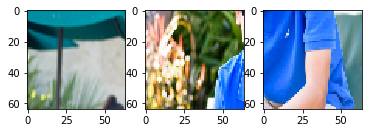

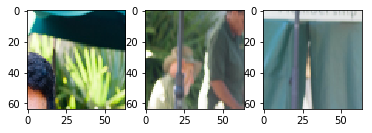

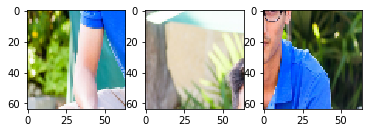

In [16]:
displayPatch(totalPatch[1])